In [2]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!pip install folium

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0         conda-forge
    geopy:           1.20.0-py_0       conda-forge

The following packages will be UPDATED:

    ca-

Data Preparation

In [3]:
# The code was removed by Watson Studio for sharing.

,Borough,Latitude,Longitude
0,Mitte,52.531677,13.381777
1,Frierichshain-Kreuzberg,52.515816,13.454293
2,Charlottenburg-Wilmersdorf,52.500000,13.283333
3,Spandau,52.551100,13.199210
4,Steglitz-Zehlendorf,52.430884,13.192662


In [96]:
# define the dataframe columns
column_names = ['Borough', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)
neighborhoods

,Borough,Latitude,Longitude


In [4]:
neighborhoods = pd.DataFrame(df_data_7)
neighborhoods

,Borough,Latitude,Longitude
0,Mitte,52.531677,13.381777
1,Frierichshain-Kreuzberg,52.515816,13.454293
2,Charlottenburg-Wilmersdorf,52.500000,13.283333
3,Spandau,52.551100,13.199210
4,Steglitz-Zehlendorf,52.430884,13.192662
5,Tempelhof-Schoeneberg,52.472160,13.404954
6,Neukoelln,52.520008,13.566667
7,Treptow-Koepernick,52.450000,13.566667
8,Marzahn-Hellersdorf,52.536107,13.604973
9,Lichtenberg,52.534306,13.502326


In [5]:
# Data with Boroughs and number of residents per Borough.
body = client_d71d1522be8649e0be4fa4a0f7ebf9b0.get_object(Bucket='courseracapstone-donotdelete-pr-w10lqhux9cverk',Key='Berlin_People.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_9 = pd.read_csv(body)
df_data_9.head()


,Borough,Resident
0,Mitte,384.172
1,Frierichshain-Kreuzberg,289.762
2,Charlottenburg-Wilmersdorf,342.332
3,Spandau,243.977
4,Steglitz-Zehlendorf,308.697


In [7]:
Res_Ber=df_data_9
Res_Ber

,Borough,Resident
0,Mitte,384.172
1,Frierichshain-Kreuzberg,289.762
2,Charlottenburg-Wilmersdorf,342.332
3,Spandau,243.977
4,Steglitz-Zehlendorf,308.697
5,Tempelhof-Schoeneberg,351.644
6,Neukoelln,329.691
7,Treptow-Koepernick,271.153
8,Marzahn-Hellersdorf,268.548
9,Lichtenberg,291.452


In [19]:
 Res_Ber['Resident']

0     384.172
1     289.762
2     342.332
3     243.977
4     308.697
5     351.644
6     329.691
7     271.153
8     268.548
9     291.452
10    265.225
11    407.765
Name: Resident, dtype: float64

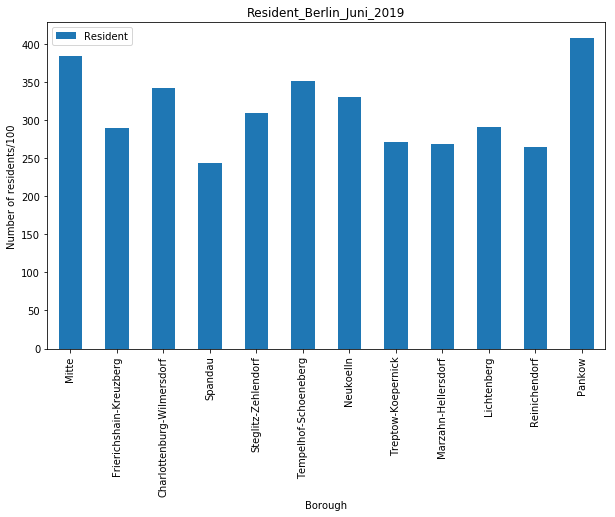

In [26]:
import matplotlib.pyplot as plt
Res_Ber.plot(x ='Borough', y='Resident',kind='bar', figsize=(10, 6))


plt.xlabel('Borough') # add to x-label to the plot
plt.ylabel('Number of residents/100') # add y-label to the plot
plt.title('Resident_Berlin_Juni_2019') # add title to the plot

plt.show()

Localisation of Berlin´s Boroughs on the map.

In [27]:
address = 'Berlin, Germany'

geolocator = Nominatim(user_agent="Ber_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Berlin City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Berlin City are 52.5170365, 13.3888599.


In [28]:
# create map of Berlin using latitude and longitude values
map_Berlin = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough']):
    label = '{}'.format(borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Berlin)  
    
map_Berlin

Call Foursquare API to get venues in a radius around the center of a each Borough

In [29]:
#CLIENT_ID = 'your-client-ID' # your Foursquare ID
CLIENT_ID = 'D5IMLD3HLP1ZE5JFDTN1CH00JY431G3TJMPDXKDXT45MXRZU' # your Foursquare ID
# CLIENT_SECRET = 'your-client-secret' # your Foursquare Secret
CLIENT_SECRET = 'HJEYIIRS2EFY2CV0Q2CUSVC3JKDH4HOC2FGNDEHQZ5VQI1G1' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: D5IMLD3HLP1ZE5JFDTN1CH00JY431G3TJMPDXKDXT45MXRZU
CLIENT_SECRET:HJEYIIRS2EFY2CV0Q2CUSVC3JKDH4HOC2FGNDEHQZ5VQI1G1


In [30]:
# type your answer here

url = 'https://api.foursquare.com/v2/venues/trending?client_id={}&client_secret={}&ll={},{}&v={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION)



Now, let's get the top 100 venues that are in Berlin within a radius of 500 meters.

In [31]:
LIMIT = 100
radius = 500
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=D5IMLD3HLP1ZE5JFDTN1CH00JY431G3TJMPDXKDXT45MXRZU&client_secret=HJEYIIRS2EFY2CV0Q2CUSVC3JKDH4HOC2FGNDEHQZ5VQI1G1&v=20180605&ll=52.5170365,13.3888599&radius=500&limit=100'

Explore Boroughs in Berlin

In [33]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

The above function is run on each Borough and create a new dataframe called Berlin_venues.

In [34]:
Berlin_venues = getNearbyVenues(names=neighborhoods['Borough'],
                                   latitudes=neighborhoods['Latitude'],
                                   longitudes=neighborhoods['Longitude']
                                  )

Mitte
Frierichshain-Kreuzberg
Charlottenburg-Wilmersdorf
Spandau
Steglitz-Zehlendorf
Tempelhof-Schoeneberg
Neukoelln
Treptow-Koepernick
Marzahn-Hellersdorf
Lichtenberg
Reinichendorf
Pankow


In [35]:
print(Berlin_venues.shape)
Berlin_venues.head()

(207, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Mitte,52.531677,13.381777,19grams,52.533037,13.380054,Coffee Shop
1,Mitte,52.531677,13.381777,Hotel i31,52.531107,13.384270,Hotel
2,Mitte,52.531677,13.381777,Museum für Naturkunde,52.530271,13.379281,Science Museum
3,Mitte,52.531677,13.381777,+84,52.532639,13.379511,Vegetarian / Vegan Restaurant
4,Mitte,52.531677,13.381777,Titanic Chaussee Berlin,52.532215,13.381012,Hotel


Let's check how many venues were returned for each neighborhood

In [36]:
Berlin_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Charlottenburg-Wilmersdorf,8,8,8,8,8,8
Frierichshain-Kreuzberg,80,80,80,80,80,80
Lichtenberg,9,9,9,9,9,9
Marzahn-Hellersdorf,16,16,16,16,16,16
Mitte,50,50,50,50,50,50
Neukoelln,3,3,3,3,3,3
Pankow,4,4,4,4,4,4
Reinichendorf,11,11,11,11,11,11
Spandau,4,4,4,4,4,4


Let's find out how many unique categories can be curated from all the returned venues

In [37]:
print('There are {} uniques categories.'.format(len(Berlin_venues['Venue Category'].unique())))

There are 94 uniques categories.



 Analyze each Borough

In [40]:
# one hot encoding
Berlin_onehot = pd.get_dummies(Berlin_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Berlin_onehot['Neighborhood'] = Berlin_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Berlin_onehot.columns[-1]] + list(Berlin_onehot.columns[:-1])
Berlin_onehot = Berlin_onehot[fixed_columns]

Berlin_onehot.head()



,Neighborhood,African Restaurant,American Restaurant,Asian Restaurant,Bagel Shop,Bakery,Bank,Bar,Beer Bar,Beer Store,Big Box Store,Bistro,Board Shop,Boat Rental,Boat or Ferry,Bookstore,Brasserie,Breakfast Spot,Burger Joint,Bus Stop,Café,Caribbean Restaurant,Cemetery,Cocktail Bar,Coffee Shop,Cosmetics Shop,Dance Studio,Deli / Bodega,Doner Restaurant,Drugstore,Electronics Store,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Flower Shop,Furniture / Home Store,Gas Station,Gastropub,German Restaurant,Gourmet Shop,Greek Restaurant,Gym,Gym / Fitness Center,Hardware Store,Hookah Bar,Hotel,Ice Cream Shop,Indian Restaurant,Intersection,Italian Restaurant,Jewelry Store,Light Rail Station,Mexican Restaurant,Middle Eastern Restaurant,Multiplex,Nightclub,Organic Grocery,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Platform,Playground,Plaza,Post Office,Pub,Ramen Restaurant,Record Shop,Rest Area,Restaurant,River,Road,Rock Climbing Spot,Sandwich Place,Sauna / Steam Room,Science Museum,Shopping Mall,Snack Place,Soccer Field,Sporting Goods Shop,Steakhouse,Supermarket,Sushi Restaurant,Tea Room,Tennis Court,Thai Restaurant,Thrift / Vintage Store,Tourist Information Center,Tram Station,Trattoria/Osteria,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Volleyball Court,Wine Bar
0,Mitte,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Mitte,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Mitte,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Mitte,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,Mitte,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [112]:
Berlin_onehot.shape

(210, 101)

Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [41]:
Berlin_grouped = Berlin_onehot.groupby('Neighborhood').mean().reset_index()
Berlin_grouped

,Neighborhood,African Restaurant,American Restaurant,Asian Restaurant,Bagel Shop,Bakery,Bank,Bar,Beer Bar,Beer Store,Big Box Store,Bistro,Board Shop,Boat Rental,Boat or Ferry,Bookstore,Brasserie,Breakfast Spot,Burger Joint,Bus Stop,Café,Caribbean Restaurant,Cemetery,Cocktail Bar,Coffee Shop,Cosmetics Shop,Dance Studio,Deli / Bodega,Doner Restaurant,Drugstore,Electronics Store,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Flower Shop,Furniture / Home Store,Gas Station,Gastropub,German Restaurant,Gourmet Shop,Greek Restaurant,Gym,Gym / Fitness Center,Hardware Store,Hookah Bar,Hotel,Ice Cream Shop,Indian Restaurant,Intersection,Italian Restaurant,Jewelry Store,Light Rail Station,Mexican Restaurant,Middle Eastern Restaurant,Multiplex,Nightclub,Organic Grocery,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Platform,Playground,Plaza,Post Office,Pub,Ramen Restaurant,Record Shop,Rest Area,Restaurant,River,Road,Rock Climbing Spot,Sandwich Place,Sauna / Steam Room,Science Museum,Shopping Mall,Snack Place,Soccer Field,Sporting Goods Shop,Steakhouse,Supermarket,Sushi Restaurant,Tea Room,Tennis Court,Thai Restaurant,Thrift / Vintage Store,Tourist Information Center,Tram Station,Trattoria/Osteria,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Volleyball Court,Wine Bar
0,Charlottenburg-Wilmersdorf,0.0000,0.0000,0.000000,0.000,0.125000,0.000000,0.0000,0.00,0.0000,0.0000,0.0000,0.000000,0.000000,0.000000,0.0000,0.00,0.00,0.00,0.000000,0.000000,0.0000,0.00,0.0000,0.000000,0.0000,0.0000,0.0000,0.000,0.000000,0.0000,0.0000,0.000000,0.000000,0.0000,0.000000,0.000000,0.0000,0.00,0.0000,0.0000,0.000000,0.0000,0.000000,0.0000,0.125000,0.0000,0.000000,0.125000,0.0000,0.000000,0.125000,0.0000,0.0000,0.0000,0.00,0.00,0.125000,0.0000,0.125000,0.000000,0.00,0.25,0.00,0.000000,0.0000,0.0000,0.0000,0.0000,0.000000,0.000000,0.000000,0.0000,0.0000,0.0000,0.0000,0.00,0.0000,0.000000,0.000000,0.000000,0.0000,0.000000,0.0000,0.0000,0.000000,0.000,0.0000,0.00,0.000000,0.00,0.000,0.00,0.00,0.00
1,Frierichshain-Kreuzberg,0.0125,0.0125,0.025000,0.025,0.062500,0.000000,0.0375,0.00,0.0125,0.0000,0.0125,0.012500,0.000000,0.000000,0.0125,0.00,0.00,0.00,0.000000,0.062500,0.0125,0.00,0.0125,0.050000,0.0125,0.0125,0.0125,0.025,0.000000,0.0000,0.0125,0.000000,0.012500,0.0125,0.000000,0.000000,0.0125,0.00,0.0125,0.0125,0.000000,0.0000,0.000000,0.0125,0.025000,0.0125,0.012500,0.000000,0.0125,0.000000,0.000000,0.0000,0.0125,0.0000,0.00,0.00,0.000000,0.0125,0.000000,0.000000,0.05,0.00,0.00,0.012500,0.0000,0.0875,0.0125,0.0125,0.000000,0.000000,0.000000,0.0125,0.0000,0.0125,0.0125,0.00,0.0000,0.000000,0.000000,0.000000,0.0125,0.025000,0.0125,0.0125,0.000000,0.025,0.0125,0.00,0.012500,0.00,0.025,0.05,0.00,0.00
2,Lichtenberg,0.0000,0.0000,0.000000,0.000,0.000000,0.000000,0.0000,0.00,0.0000,0.0000,0.0000,0.000000,0.000000,0.000000,0.0000,0.00,0.00,0.00,0.000000,0.000000,0.0000,0.00,0.0000,0.000000,0.0000,0.0000,0.0000,0.000,0.111111,0.0000,0.0000,0.000000,0.111111,0.0000,0.111111,0.000000,0.0000,0.00,0.0000,0.0000,0.000000,0.0000,0.111111,0.0000,0.000000,0.0000,0.000000,0.000000,0.0000,0.000000,0.000000,0.0000,0.0000,0.0000,0.00,0.00,0.000000,0.0000,0.000000,0.111111,0.00,0.00,0.00,0.000000,0.0000,0.0000,0.0000,0.0000,0.000000,0.000000,0.000000,0.0000,0.0000,0.0000,0.0000,0.00,0.0000,0.000000,0.111111,0.000000,0.0000,0.111111,0.0000,0.0000,0.000000,0.000,0.0000,0.00,0.222222,0.00,0.000,0.00,0.00,0.00
3,Marzahn-Hellersdorf,0.0000,0.0000,0.000000,0.000,0.062500,0.062500,0.0000,0.00,0.0000,0.0625,0.0000,0.000000,0.000000,0.000000,0.0000,0.00,0.00,0.00,0.000000,0.000000,0.0000,0.00,0.0000,0.000000,0.0000,0.0000,0.0000,0.000,0.062500,0.0625,0.0000,0.000000,0.000000,0.0000,0.000000,0.000000,0.0000,0.00,0.0000,0.0000,0.000000,0.0625,0.000000,0.0000,0.000000,0.0625,0.062500,0.000000,0.0000,0.000000,0.000000,0.0625,0.0000,0.0625,0.00,0.00,0.000000,0.0000,0.000000,0.000000,0.00,0.00,0.00,0.062500,0.0625,0.0000,0.0000,0.0000,0.000000,0.000000,0.000000,0.0000,0.0

In [114]:
Berlin_grouped.shape

(12, 101)

Let's print each neighborhood along with the top 5 most common venues

In [42]:
num_top_venues = 5

for hood in Berlin_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = Berlin_grouped[Berlin_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Charlottenburg-Wilmersdorf----
          venue  freq
0      Platform  0.25
1  Intersection  0.12
2         Hotel  0.12
3          Park  0.12
4     Pet Store  0.12


----Frierichshain-Kreuzberg----
                   venue  freq
0                    Pub  0.09
1                 Bakery  0.06
2                   Café  0.06
3            Pizza Place  0.05
4  Vietnamese Restaurant  0.05


----Lichtenberg----
                  venue  freq
0          Tram Station  0.22
1           Supermarket  0.11
2             Drugstore  0.11
3  Fast Food Restaurant  0.11
4        Hardware Store  0.11


----Marzahn-Hellersdorf----
                venue  freq
0         Supermarket  0.12
1  Rock Climbing Spot  0.06
2       Big Box Store  0.06
3  Mexican Restaurant  0.06
4       Shopping Mall  0.06


----Mitte----
                  venue  freq
0                 Hotel  0.10
1           Coffee Shop  0.10
2                  Café  0.08
3  Gym / Fitness Center  0.06
4                  Park  0.06


----Neukoelln--

Let's put that into a pandas dataframe

In [43]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [44]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Berlin_grouped['Neighborhood']

for ind in np.arange(Berlin_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Berlin_grouped.iloc[ind, :], num_top_venues)

#neighborhoods_venues_sorted.head()
neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Charlottenburg-Wilmersdorf,Platform,Hotel,Park,Intersection,Bakery,Light Rail Station,Pet Store,Doner Restaurant,Drugstore,Electronics Store
1,Frierichshain-Kreuzberg,Pub,Café,Bakery,Coffee Shop,Vietnamese Restaurant,Pizza Place,Bar,Hotel,Supermarket,Doner Restaurant
2,Lichtenberg,Tram Station,Hardware Store,Drugstore,Pharmacy,Furniture / Home Store,Supermarket,Fast Food Restaurant,Soccer Field,Wine Bar,Falafel Restaurant
3,Marzahn-Hellersdorf,Supermarket,Indian Restaurant,Ice Cream Shop,Mexican Restaurant,Multiplex,Electronics Store,Drugstore,Plaza,Post Office,Rock Climbing Spot
4,Mitte,Coffee Shop,Hotel,Café,Gym / Fitness Center,Park,Italian Restaurant,Drugstore,Pub,Plaza,Playground
5,Neukoelln,Board Shop,Bus Stop,Gym,Furniture / Home Store,Deli / Bodega,Doner Restaurant,Drugstore,Electronics Store,Ethiopian Restaurant,Falafel Restaurant
6,Pankow,Hotel,Asian Restaurant,Tram Station,Supermarket,Hardware Store,Flower Shop,Dance Studio,Deli / Bodega,Doner Restaurant,Drugstore
7,Reinichendorf,Supermarket,Bakery,Indian Restaurant,Jewelry Store,Gas Station,Pet Store,Falafel Restaurant,Restaurant,Bank,Beer Bar
8,Spandau,Supermarket,Italian Restaurant,Bus Stop,Furniture / Home Store,Dance Studio,Deli / Bodega,Doner Restaurant,Drugstore,Electronics Store,Ethiopian Restaurant
9,Steglitz-Zehlendorf,Rest Area,Café,Fast Food Restaurant,Snack Place,Coffee Shop,Gas Station,Supermarket,Light Rail Station,Tennis Court,Intersection


Cluster Neighborhoods

In [49]:
# 
# find the best k (number of clusters) regarding the inertia_ score
#
Ks = 7 # number of ks we will test
inertias = np.zeros((Ks-1))
for n in range(1,Ks):
    
    # run k-means clustering
    kmeans = KMeans(n_clusters=n, random_state=0, n_init = 12).fit(Berlin_grouped)
    inertias[n-1] = kmeans.inertia_

# display the inertia    
inertias

ValueError: could not convert string to float: 'Treptow-Koepernick'

In [46]:
# 
# plot the inertia with the different k to find the better balance
#
plt.plot(range(1,Ks),inertias,'g')
plt.ylabel('Inertia ')
plt.xlabel('Number of centers/clusters (K)')
plt.tight_layout()
plt.show()

NameError: name 'Ks' is not defined

In [50]:
# I´ve decided to choose 4 as it is a good balance between clutering reability and inertia score
kclusters = 4

Berlin_grouped_clustering = Berlin_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Berlin_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 0, 0, 0, 3, 0, 0, 2, 0], dtype=int32)

In [52]:
Berlin_data=df_data_7

In [67]:
Berlin_data.rename({'Borough': 'Neighborhood'}, axis=1, inplace=True)
Berlin_data

,Neighborhood,Latitude,Longitude
0,Mitte,52.531677,13.381777
1,Frierichshain-Kreuzberg,52.515816,13.454293
2,Charlottenburg-Wilmersdorf,52.500000,13.283333
3,Spandau,52.551100,13.199210
4,Steglitz-Zehlendorf,52.430884,13.192662
5,Tempelhof-Schoeneberg,52.472160,13.404954
6,Neukoelln,52.520008,13.566667
7,Treptow-Koepernick,52.450000,13.566667
8,Marzahn-Hellersdorf,52.536107,13.604973
9,Lichtenberg,52.534306,13.502326


In [69]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels1', kmeans.labels_)

Berlin_merged = df_data_7

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
Berlin_merged = Berlin_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

#Berlin_merged.head() # check the last columns!
Berlin_merged

,Neighborhood,Latitude,Longitude,Cluster Labels1,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Mitte,52.531677,13.381777,0,0,Coffee Shop,Hotel,Café,Gym / Fitness Center,Park,Italian Restaurant,Drugstore,Pub,Plaza,Playground
1,Frierichshain-Kreuzberg,52.515816,13.454293,0,0,Pub,Café,Bakery,Coffee Shop,Vietnamese Restaurant,Pizza Place,Bar,Hotel,Supermarket,Doner Restaurant
2,Charlottenburg-Wilmersdorf,52.500000,13.283333,0,0,Platform,Hotel,Park,Intersection,Bakery,Light Rail Station,Pet Store,Doner Restaurant,Drugstore,Electronics Store
3,Spandau,52.551100,13.199210,2,2,Supermarket,Italian Restaurant,Bus Stop,Furniture / Home Store,Dance Studio,Deli / Bodega,Doner Restaurant,Drugstore,Electronics Store,Ethiopian Restaurant
4,Steglitz-Zehlendorf,52.430884,13.192662,0,0,Rest Area,Café,Fast Food Restaurant,Snack Place,Coffee Shop,Gas Station,Supermarket,Light Rail Station,Tennis Court,Intersection
5,Tempelhof-Schoeneberg,52.472160,13.404954,1,1,Park,Sporting Goods Shop,Wine Bar,Flower Shop,Dance Studio,Deli / Bodega,Doner Restaurant,Drugstore,Electronics Store,Ethiopian Restaurant
6,Neukoelln,52.520008,13.566667,3,3,Board Shop,Bus Stop,Gym,Furniture / Home Store,Deli / Bodega,Doner Restaurant,Drugstore,Electronics Store,Ethiopian Restaurant,Falafel Restaurant
7,Treptow-Koepernick,52.450000,13.566667,0,0,Park,Boat Rental,River,Tram Station,Light Rail Station,Boat or Ferry,Deli / Bodega,Doner Restaurant,Drugstore,Electronics Store
8,Marzahn-Hellersdorf,52.536107,13.604973,0,0,Supermarket,Indian Restaurant,Ice Cream Shop,Mexican Restaurant,Multiplex,Electronics Store,Drugstore,Plaza,Post Office,Rock Climbing Spot
9,Lichtenberg,52.534306,13.502326,0,0,Tram Station,Hardware Store,Drugstore,Pharmacy,Furniture / Home Store,Supermarket,Fast Food Restaurant,Soccer Field,Wine Bar,Falafel Restaurant


In [70]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Berlin_merged['Latitude'], Berlin_merged['Longitude'], Berlin_merged['Neighborhood'], Berlin_merged['Cluster Labels1']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [71]:
Berlin_merged.loc[Berlin_merged['Cluster Labels1'] == 0, Berlin_merged.columns[[1] + list(range(5, Berlin_merged.shape[1]))]]

,Latitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,52.531677,Coffee Shop,Hotel,Café,Gym / Fitness Center,Park,Italian Restaurant,Drugstore,Pub,Plaza,Playground
1,52.515816,Pub,Café,Bakery,Coffee Shop,Vietnamese Restaurant,Pizza Place,Bar,Hotel,Supermarket,Doner Restaurant
2,52.500000,Platform,Hotel,Park,Intersection,Bakery,Light Rail Station,Pet Store,Doner Restaurant,Drugstore,Electronics Store
4,52.430884,Rest Area,Café,Fast Food Restaurant,Snack Place,Coffee Shop,Gas Station,Supermarket,Light Rail Station,Tennis Court,Intersection
7,52.450000,Park,Boat Rental,River,Tram Station,Light Rail Station,Boat or Ferry,Deli / Bodega,Doner Restaurant,Drugstore,Electronics Store
8,52.536107,Supermarket,Indian Restaurant,Ice Cream Shop,Mexican Restaurant,Multiplex,Electronics Store,Drugstore,Plaza,Post Office,Rock Climbing Spot
9,52.534306,Tram Station,Hardware Store,Drugstore,Pharmacy,Furniture / Home Store,Supermarket,Fast Food Restaurant,Soccer Field,Wine Bar,Falafel Restaurant
10,52.566667,Supermarket,Bakery,Indian Restaurant,Jewelry Store,Gas Station,Pet Store,Falafel Restaurant,Restaurant,Bank,Beer Bar
11,52.592879,Hotel,Asian Restaurant,Tram Station,Supermarket,Hardware Store,Flower Shop,Dance Studio,Deli / Bodega,Doner Restaurant,Drugstore


In [79]:
Berlin_merged.loc[Berlin_merged['Cluster Labels1'] == 1, Berlin_merged.columns[[1] + list(range(5, Berlin_merged.shape[1]))]]

,Latitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,52.47216,Park,Sporting Goods Shop,Wine Bar,Flower Shop,Dance Studio,Deli / Bodega,Doner Restaurant,Drugstore,Electronics Store,Ethiopian Restaurant


In [80]:
Berlin_merged.loc[Berlin_merged['Cluster Labels1'] == 2, Berlin_merged.columns[[1] + list(range(5, Berlin_merged.shape[1]))]]

,Latitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,52.5511,Supermarket,Italian Restaurant,Bus Stop,Furniture / Home Store,Dance Studio,Deli / Bodega,Doner Restaurant,Drugstore,Electronics Store,Ethiopian Restaurant


In [81]:
Berlin_merged.loc[Berlin_merged['Cluster Labels1'] == 3, Berlin_merged.columns[[1] + list(range(5, Berlin_merged.shape[1]))]]

,Latitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,52.520008,Board Shop,Bus Stop,Gym,Furniture / Home Store,Deli / Bodega,Doner Restaurant,Drugstore,Electronics Store,Ethiopian Restaurant,Falafel Restaurant
